In [15]:
from particletracking import dataframes
import filehandling
from particletracking import statistics
import matplotlib.pyplot as plt

In [2]:
folder = "/media/data/Data/FirstOrder/PhaseDiagram/2020Setup"

In [4]:
files = filehandling.get_directory_filenames(f"{folder}/*.hdf5")

In [5]:
files

['/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_550.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_575.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_600.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_625.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_650.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_675.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_700.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_725.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1700_750.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1750_550.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1750_575.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1750_600.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1750_625.hdf5',
 '/media/data/Data/FirstOrder/PhaseDiagram/2020Setup/1750_650.hdf5',
 '/media/data/Data/FirstOrder/Phas

In [6]:
data = dataframes.DataStore(files[-15])

In [7]:
data.df.head()

,x,y,r,Duty,order_r,order_i,neighbors,order,density,shape_factor,on_edge
frame,,,,,,,,,,,
0,574,1477,17,625.0,-0.923126,-0.119519,5,0.930831,0.765678,1.113391,False
0,477,1456,17,625.0,-0.966200,0.077965,6,0.969341,0.827014,1.104851,False
0,1220,1009,17,625.0,-0.968538,0.174219,6,0.984083,0.833193,1.104493,False
0,354,1050,17,625.0,-0.912589,0.078085,5,0.915923,0.742922,1.118266,False
0,1379,846,17,625.0,-0.920406,-0.069099,6,0.922996,0.850051,1.107100,False


In [9]:
pc = statistics.PropertyCalculator(data)

In [10]:
pc.order_long()

100%|██████████| 216/216 [00:03<00:00, 71.76it/s]


array([[<AxesSubplot:title={'center':'order_long'}>]], dtype=object)

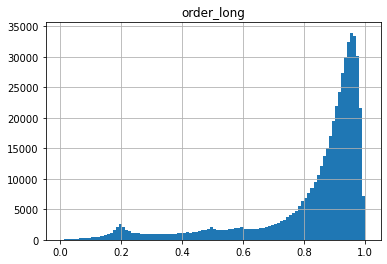

In [13]:
data.df.hist('order_long', bins=100)

In [53]:
%matplotlib auto
for file in files:
    data = dataframes.DataStore(file)
    pc = statistics.PropertyCalculator(data)
    pc.order_long()
    plt.figure()
    plt.hist(data.df.order_long, bins=100)
    plt.axvline(np.mean(data.df.order_long), c='r')
    plt.axvline(np.median(data.df.order_long), c='b')
    plt.title(file)
    

  4%|▍         | 9/216 [00:00<00:02, 83.54it/s]

Using matplotlib backend: Qt5Agg


100%|██████████| 216/216 [00:02<00:00, 100.09it/s]
/home/ppxjd3/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
100%|██████████| 240/240 [00:02<00:00, 99.50it/s] 


In [21]:
import os
import numpy as np

In [31]:
densities = []
duties = []
order_means = []
order_medians = []
for file in files:
    filename = os.path.splitext(os.path.split(file)[1])[0]
    density, duty = filename.split('_')
    density = int(density)
    duty = int(duty)
    data = dataframes.DataStore(file)
    order_mean = data.df.order_long.mean()
    order_median = np.median(data.df.order_long)
    densities.append(density)
    duties.append(duty)
    order_means.append(order_mean)
    order_medians.append(order_median)
    

In [39]:
duties_s = np.array(duties).reshape(-1, 9)
duties_s

array([[550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750],
       [550, 575, 600, 625, 650, 675, 700, 725, 750]])

In [40]:
densities_s = np.array(densities).reshape(-1, 9)
densities_s

array([[1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700],
       [1750, 1750, 1750, 1750, 1750, 1750, 1750, 1750, 1750],
       [1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800],
       [1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850],
       [1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900],
       [1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950],
       [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],
       [2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050, 2050],
       [2100, 2100, 2100, 2100, 2100, 2100, 2100, 2100, 2100],
       [2150, 2150, 2150, 2150, 2150, 2150, 2150, 2150, 2150],
       [2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200],
       [2250, 2250, 2250, 2250, 2250, 2250, 2250, 2250, 2250],
       [2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300],
       [2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350]])

In [41]:
order_means = np.array(order_means).reshape(-1, 9)
order_medians = np.array(order_medians).reshape(-1, 9)

In [46]:
plt.contourf(densities_s, duties_s, order_medians, levels=100)

In [55]:
plt.close('all')

In [47]:
diff = order_means - order_medians

In [66]:
plt.contour(densities_s, duties_s, diff, levels=[0])
# plt.colorbar()
plt.ylim([600, 700])
plt.xlim([1700, 2400])
plt.ylabel('Duty')
plt.xlabel('N')

Text(0.5, 0, 'N')